In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
page = requests.get("https://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168#.XukJh0VKg2w")

In [3]:
page

<Response [200]>

In [4]:
page.status_code

200

In [5]:
soup = BeautifulSoup(page.content,"html.parser")

In [6]:
soup

<!DOCTYPE html>

<html class="no-js">
<head>
<!-- Meta -->
<meta content="width=device-width" name="viewport"/>
<link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/><title>National Weather Service</title><meta content="National Weather Service" name="DC.title"><meta content="NOAA National Weather Service National Weather Service" name="DC.description"/><meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/><meta content="" name="DC.date.created" scheme="ISO8601"/><meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/><meta content="weather, National Weather Service" name="DC.keywords"/><meta content="NOAA's National Weather Service" name="DC.publisher"/><meta content="National Weather Service" name="DC.contributor"/><meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/><meta content="General" name="rating"/><meta content="index,follow" name="robots"/>
<!-- Icons -->
<link href="./images/favicon.ico" rel="shor

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js">
 <head>
  <!-- Meta -->
  <meta content="width=device-width" name="viewport"/>
  <link href="http://purl.org/dc/elements/1.1/" rel="schema.DC"/>
  <title>
   National Weather Service
  </title>
  <meta content="National Weather Service" name="DC.title">
   <meta content="NOAA National Weather Service National Weather Service" name="DC.description"/>
   <meta content="US Department of Commerce, NOAA, National Weather Service" name="DC.creator"/>
   <meta content="" name="DC.date.created" scheme="ISO8601"/>
   <meta content="EN-US" name="DC.language" scheme="DCTERMS.RFC1766"/>
   <meta content="weather, National Weather Service" name="DC.keywords"/>
   <meta content="NOAA's National Weather Service" name="DC.publisher"/>
   <meta content="National Weather Service" name="DC.contributor"/>
   <meta content="http://www.weather.gov/disclaimer.php" name="DC.rights"/>
   <meta content="General" name="rating"/>
   <meta content="index,follow" name="robots"/>

In [10]:
# I went through the url to find the seven day forecast.
seven_day = soup.find(id = "seven-day-forecast")
seven_day

<div class="panel panel-default" id="seven-day-forecast">
<div class="panel-heading">
<b>Extended Forecast for</b>
<h2 class="panel-title">
	    	    San Francisco CA	</h2>
</div>
<div class="panel-body" id="seven-day-forecast-body">
<div id="seven-day-forecast-container"><ul class="list-unstyled" id="seven-day-forecast-list"><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Today<br/><br/></p>
<p><img alt="Today: Sunny, with a high near 70. West wind 10 to 20 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 70. West wind 10 to 20 mph. "/></p><p class="short-desc">Sunny</p><p class="temp temp-high">High: 70 °F</p></div></li><li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Tonight<br/><br/></p>
<p><img alt="Tonight: Clear, with a low around 57. West wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. " class="forecast-icon" src="newimages/medium/nskc.pn

In [11]:
print(seven_day.prettify())

<div class="panel panel-default" id="seven-day-forecast">
 <div class="panel-heading">
  <b>
   Extended Forecast for
  </b>
  <h2 class="panel-title">
   San Francisco CA
  </h2>
 </div>
 <div class="panel-body" id="seven-day-forecast-body">
  <div id="seven-day-forecast-container">
   <ul class="list-unstyled" id="seven-day-forecast-list">
    <li class="forecast-tombstone">
     <div class="tombstone-container">
      <p class="period-name">
       Today
       <br/>
       <br/>
      </p>
      <p>
       <img alt="Today: Sunny, with a high near 70. West wind 10 to 20 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 70. West wind 10 to 20 mph. "/>
      </p>
      <p class="short-desc">
       Sunny
      </p>
      <p class="temp temp-high">
       High: 70 °F
      </p>
     </div>
    </li>
    <li class="forecast-tombstone">
     <div class="tombstone-container">
      <p class="period-name">
       Tonight
       <br/>
       <

In [12]:
forecasts = seven_day.find_all(class_ = 'forecast-tombstone')

In [13]:
forecasts

[<li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Today<br/><br/></p>
 <p><img alt="Today: Sunny, with a high near 70. West wind 10 to 20 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 70. West wind 10 to 20 mph. "/></p><p class="short-desc">Sunny</p><p class="temp temp-high">High: 70 °F</p></div></li>,
 <li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Tonight<br/><br/></p>
 <p><img alt="Tonight: Clear, with a low around 57. West wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. " class="forecast-icon" src="newimages/medium/nskc.png" title="Tonight: Clear, with a low around 57. West wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. "/></p><p class="short-desc">Clear</p><p class="temp temp-low">Low: 57 °F</p></div></li>,
 <li class="forecast-tombstone">
 <div class="tombstone-container">
 <p class="period-name">Wednesday<br/><br/></p>

In [17]:
today = forecasts[0]

In [18]:
today

<li class="forecast-tombstone">
<div class="tombstone-container">
<p class="period-name">Today<br/><br/></p>
<p><img alt="Today: Sunny, with a high near 70. West wind 10 to 20 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 70. West wind 10 to 20 mph. "/></p><p class="short-desc">Sunny</p><p class="temp temp-high">High: 70 °F</p></div></li>

In [25]:
print(today.prettify())

<li class="forecast-tombstone">
 <div class="tombstone-container">
  <p class="period-name">
   Today
   <br/>
   <br/>
  </p>
  <p>
   <img alt="Today: Sunny, with a high near 70. West wind 10 to 20 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 70. West wind 10 to 20 mph. "/>
  </p>
  <p class="short-desc">
   Sunny
  </p>
  <p class="temp temp-high">
   High: 70 °F
  </p>
 </div>
</li>



There are 4 elements which we can extract from each period's forecast:
1. period name (class_ = "period-name")
2. Description (stored in title property of img)
3. Short Description (stored in class_ = "short-desc")
4. Temperature (stored in class_ "temp temp-high")
We will extract each of these for the 1st element in forecasts, today

In [20]:
period_today = today.find(class_ = "period-name")

In [22]:
period_today.get_text()

'Today'

In [23]:
period_today = period_today.get_text()

In [24]:
period_today

'Today'

In [26]:
short_desc_today = today.find(class_ = "short-desc")

In [28]:
short_desc_today = short_desc_today.get_text()

In [29]:
short_desc_today

'Sunny'

In [30]:
temp_today = today.find(class_ = "temp temp-high").get_text()

In [31]:
temp_today

'High: 70 °F'

To get the description, we will treat BeautifulSoup object as a dictionary and pass in attribute we want as a key

In [32]:
img_today = today.find("img")

In [33]:
img_today

<img alt="Today: Sunny, with a high near 70. West wind 10 to 20 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 70. West wind 10 to 20 mph. "/>

In [36]:
title_today = img_today["title"]

In [37]:
title_today

'Today: Sunny, with a high near 70. West wind 10 to 20 mph. '

# Extracting all forecasts for each day in 7 day forecast

We will use CSS selectors and list comprehension

In [41]:
period_tags = seven_day.select(".tombstone-container .period-name")

In [42]:
period_tags

[<p class="period-name">Today<br/><br/></p>,
 <p class="period-name">Tonight<br/><br/></p>,
 <p class="period-name">Wednesday<br/><br/></p>,
 <p class="period-name">Wednesday<br/>Night</p>,
 <p class="period-name">Thursday<br/><br/></p>,
 <p class="period-name">Thursday<br/>Night</p>,
 <p class="period-name">Friday<br/><br/></p>,
 <p class="period-name">Friday<br/>Night</p>,
 <p class="period-name">Saturday<br/><br/></p>]

In [43]:
period_names = [pt.get_text() for pt in period_tags]
period_names

['Today',
 'Tonight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight',
 'Friday',
 'FridayNight',
 'Saturday']

In [44]:
short_desc_tags = seven_day.select(".tombstone-container .short-desc")

In [45]:
short_desc_tags

[<p class="short-desc">Sunny</p>,
 <p class="short-desc">Clear</p>,
 <p class="short-desc">Sunny</p>,
 <p class="short-desc">Clear</p>,
 <p class="short-desc">Sunny</p>,
 <p class="short-desc">Mostly Clear</p>,
 <p class="short-desc">Sunny</p>,
 <p class="short-desc">Mostly Clear</p>,
 <p class="short-desc">Sunny</p>]

In [46]:
short_descs = [sd.get_text() for sd in short_desc_tags]
short_descs

['Sunny',
 'Clear',
 'Sunny',
 'Clear',
 'Sunny',
 'Mostly Clear',
 'Sunny',
 'Mostly Clear',
 'Sunny']

In [47]:
temp_tags = seven_day.select(".tombstone-container .temp")

In [48]:
temps = [t.get_text() for t in temp_tags]

In [49]:
temps

['High: 70 °F',
 'Low: 57 °F',
 'High: 78 °F',
 'Low: 58 °F',
 'High: 80 °F',
 'Low: 57 °F',
 'High: 76 °F',
 'Low: 57 °F',
 'High: 74 °F']

In [53]:
desc_tags = seven_day.select(".tombstone-container img")

In [54]:
desc_tags

[<img alt="Today: Sunny, with a high near 70. West wind 10 to 20 mph. " class="forecast-icon" src="newimages/medium/few.png" title="Today: Sunny, with a high near 70. West wind 10 to 20 mph. "/>,
 <img alt="Tonight: Clear, with a low around 57. West wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. " class="forecast-icon" src="newimages/medium/nskc.png" title="Tonight: Clear, with a low around 57. West wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. "/>,
 <img alt="Wednesday: Sunny, with a high near 78. West wind 8 to 14 mph. " class="forecast-icon" src="newimages/medium/skc.png" title="Wednesday: Sunny, with a high near 78. West wind 8 to 14 mph. "/>,
 <img alt="Wednesday Night: Clear, with a low around 58. West southwest wind 5 to 14 mph, with gusts as high as 18 mph. " class="forecast-icon" src="newimages/medium/nskc.png" title="Wednesday Night: Clear, with a low around 58. West southwest wind 5 to 14 mph, with gusts as high as 18 mph. "/>,
 <img alt="Thursday:

In [55]:
descs = [d["title"] for d in desc_tags]

In [56]:
descs

['Today: Sunny, with a high near 70. West wind 10 to 20 mph. ',
 'Tonight: Clear, with a low around 57. West wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. ',
 'Wednesday: Sunny, with a high near 78. West wind 8 to 14 mph. ',
 'Wednesday Night: Clear, with a low around 58. West southwest wind 5 to 14 mph, with gusts as high as 18 mph. ',
 'Thursday: Sunny, with a high near 80. Light and variable wind becoming west 9 to 14 mph in the afternoon. ',
 'Thursday Night: Mostly clear, with a low around 57.',
 'Friday: Sunny, with a high near 76.',
 'Friday Night: Mostly clear, with a low around 57.',
 'Saturday: Sunny, with a high near 74.']

# All of the 4 lists

In [57]:
period_names

['Today',
 'Tonight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight',
 'Friday',
 'FridayNight',
 'Saturday']

In [58]:
descs

['Today: Sunny, with a high near 70. West wind 10 to 20 mph. ',
 'Tonight: Clear, with a low around 57. West wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. ',
 'Wednesday: Sunny, with a high near 78. West wind 8 to 14 mph. ',
 'Wednesday Night: Clear, with a low around 58. West southwest wind 5 to 14 mph, with gusts as high as 18 mph. ',
 'Thursday: Sunny, with a high near 80. Light and variable wind becoming west 9 to 14 mph in the afternoon. ',
 'Thursday Night: Mostly clear, with a low around 57.',
 'Friday: Sunny, with a high near 76.',
 'Friday Night: Mostly clear, with a low around 57.',
 'Saturday: Sunny, with a high near 74.']

In [59]:
short_descs

['Sunny',
 'Clear',
 'Sunny',
 'Clear',
 'Sunny',
 'Mostly Clear',
 'Sunny',
 'Mostly Clear',
 'Sunny']

In [60]:
temps

['High: 70 °F',
 'Low: 57 °F',
 'High: 78 °F',
 'Low: 58 °F',
 'High: 80 °F',
 'Low: 57 °F',
 'High: 76 °F',
 'Low: 57 °F',
 'High: 74 °F']

# Creating a Pandas DataFrame with the 4 lists

In [62]:
import pandas as pd

In [78]:
forecast_df = pd.DataFrame(data = list(zip(period_names,descs)),columns=["Period","Description"])

In [79]:
forecast_df

,Period,Description
0,Today,"Today: Sunny, with a high near 70. West wind 1..."
1,Tonight,"Tonight: Clear, with a low around 57. West win..."
2,Wednesday,"Wednesday: Sunny, with a high near 78. West wi..."
3,WednesdayNight,"Wednesday Night: Clear, with a low around 58. ..."
4,Thursday,"Thursday: Sunny, with a high near 80. Light an..."
5,ThursdayNight,"Thursday Night: Mostly clear, with a low aroun..."
6,Friday,"Friday: Sunny, with a high near 76."
7,FridayNight,"Friday Night: Mostly clear, with a low around 57."
8,Saturday,"Saturday: Sunny, with a high near 74."


In [80]:
forecast_df['Short Description'] = short_descs

In [81]:
forecast_df['Temperature'] = temps

In [82]:
forecast_df

,Period,Description,Short Description,Temperature
0,Today,"Today: Sunny, with a high near 70. West wind 1...",Sunny,High: 70 °F
1,Tonight,"Tonight: Clear, with a low around 57. West win...",Clear,Low: 57 °F
2,Wednesday,"Wednesday: Sunny, with a high near 78. West wi...",Sunny,High: 78 °F
3,WednesdayNight,"Wednesday Night: Clear, with a low around 58. ...",Clear,Low: 58 °F
4,Thursday,"Thursday: Sunny, with a high near 80. Light an...",Sunny,High: 80 °F
5,ThursdayNight,"Thursday Night: Mostly clear, with a low aroun...",Mostly Clear,Low: 57 °F
6,Friday,"Friday: Sunny, with a high near 76.",Sunny,High: 76 °F
7,FridayNight,"Friday Night: Mostly clear, with a low around 57.",Mostly Clear,Low: 57 °F
8,Saturday,"Saturday: Sunny, with a high near 74.",Sunny,High: 74 °F


In [83]:
# Second Way to Create DataFrame (using Dictionary)

0

In [85]:
days_dict = {"Period": period_names,
            "Description" : descs,
            "Short Descritpion" : short_descs,
            "Temperature": temps}

In [86]:
forecast_df = pd.DataFrame(days_dict)

In [87]:
forecast_df

,Period,Description,Short Descritpion,Temperature
0,Today,"Today: Sunny, with a high near 70. West wind 1...",Sunny,High: 70 °F
1,Tonight,"Tonight: Clear, with a low around 57. West win...",Clear,Low: 57 °F
2,Wednesday,"Wednesday: Sunny, with a high near 78. West wi...",Sunny,High: 78 °F
3,WednesdayNight,"Wednesday Night: Clear, with a low around 58. ...",Clear,Low: 58 °F
4,Thursday,"Thursday: Sunny, with a high near 80. Light an...",Sunny,High: 80 °F
5,ThursdayNight,"Thursday Night: Mostly clear, with a low aroun...",Mostly Clear,Low: 57 °F
6,Friday,"Friday: Sunny, with a high near 76.",Sunny,High: 76 °F
7,FridayNight,"Friday Night: Mostly clear, with a low around 57.",Mostly Clear,Low: 57 °F
8,Saturday,"Saturday: Sunny, with a high near 74.",Sunny,High: 74 °F


In [93]:
forecast_df['Temperature Fahrenheit'] = forecast_df['Temperature'].apply(lambda string: int(string[-5:-3]))

In [96]:
forecast_df

,Period,Description,Short Descritpion,Temperature,Temperature Fahrenheit
0,Today,"Today: Sunny, with a high near 70. West wind 1...",Sunny,High: 70 °F,70
1,Tonight,"Tonight: Clear, with a low around 57. West win...",Clear,Low: 57 °F,57
2,Wednesday,"Wednesday: Sunny, with a high near 78. West wi...",Sunny,High: 78 °F,78
3,WednesdayNight,"Wednesday Night: Clear, with a low around 58. ...",Clear,Low: 58 °F,58
4,Thursday,"Thursday: Sunny, with a high near 80. Light an...",Sunny,High: 80 °F,80
5,ThursdayNight,"Thursday Night: Mostly clear, with a low aroun...",Mostly Clear,Low: 57 °F,57
6,Friday,"Friday: Sunny, with a high near 76.",Sunny,High: 76 °F,76
7,FridayNight,"Friday Night: Mostly clear, with a low around 57.",Mostly Clear,Low: 57 °F,57
8,Saturday,"Saturday: Sunny, with a high near 74.",Sunny,High: 74 °F,74


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [117]:
plt.rcParams['figure.figsize'] = (9,7)

In [112]:
sns.set_style("darkgrid")

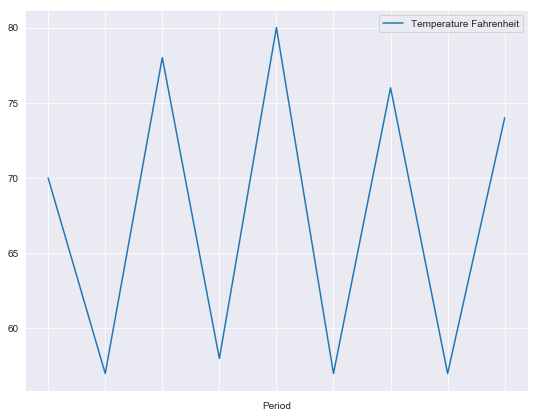

In [118]:
forecast_df.plot("Period","Temperature Fahrenheit")

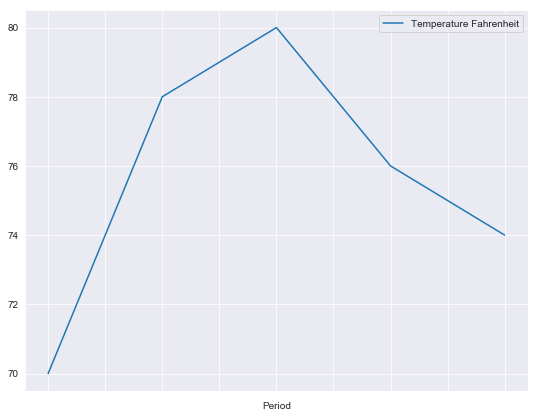

In [122]:
forecast_df[forecast_df['Temperature'].str[0:4] == "High"].plot("Period","Temperature Fahrenheit")


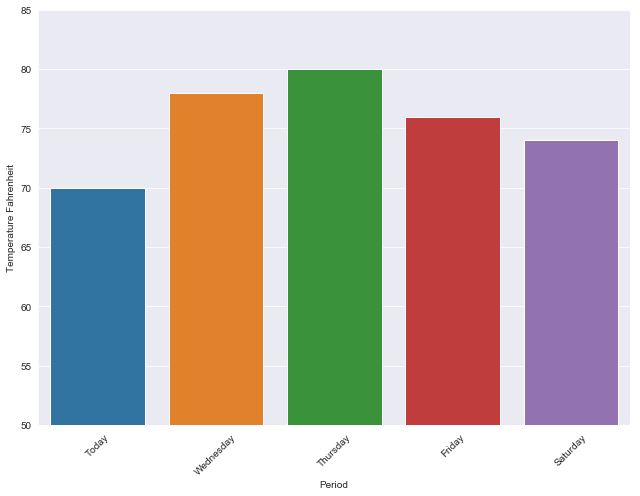

In [138]:
sns.barplot(data = forecast_df[forecast_df["Temperature"].str[0:4] == "High"],x = "Period", y = "Temperature Fahrenheit")
plt.xticks(rotation = 45)
plt.ylim([50,85])
plt.tight_layout()

(50, 60)

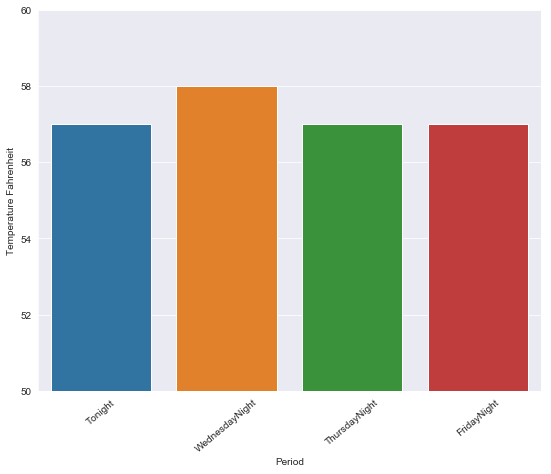

In [137]:
sns.barplot(data = forecast_df[forecast_df["Temperature"].str[0:3] == "Low"], x = "Period", y="Temperature Fahrenheit")
plt.xticks(rotation = 40)
plt.ylim([50,60])